In [1]:
import tensorflow.keras.backend as K
import multiprocessing

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import random
import logging

from gensim.models.word2vec import Word2Vec

from nltk.stem.lancaster import LancasterStemmer
from nltk.tokenize import RegexpTokenizer

In [2]:
# Set random seed (for reproducibility)
np.random.seed(1000)

In [3]:
#dataset_location = './datasets/sarcasm_v2.csv'
dataset_location = './datasets/text_and_annorations.csv'
model_location = './word2vec/'

corpus = []
labels = []

In [4]:
#Shuffle the dataset

ip=open(dataset_location,'r', encoding="utf8")
next(ip)   #ignore the first row (label row)
li = ip.readlines()
random.shuffle(li)

#dataset_location = './datasets/shuffled_sarcasm_v2.csv'
dataset_location = './datasets/shuffled_text_and_annotations.csv'

fid = open(dataset_location, "w", encoding="utf8")
fid.writelines(li)
fid.close()

In [5]:
# Parse tweets and sentiments       
with open(dataset_location, 'r', encoding="utf8") as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    
    #skip the first line?
    #next(csvReader)
    
    for row in csvReader:
        #corpus.append(row[3] + " - " + row[4])
        corpus.append(row[1])

        #Sarcasm label, (0 = not sarcasm, 1 = sarcasm)
        #pol = 1 if row[1] == 'sarc' else 0
        pol = 1 if row[5] == 'Yes' else 0
        labels.append(pol)
        
print('Corpus size: {}'.format(len(corpus)))

Corpus size: 994


In [6]:
# Tokenize and stem
tkr = RegexpTokenizer('[a-zA-Z0-9@]+')
stemmer = LancasterStemmer()

tokenized_corpus = []

for i, tweet in enumerate(corpus):
    tokens = [stemmer.stem(t) for t in tkr.tokenize(tweet) if not t.startswith('@')]
    #tokens = [t for t in tkr.tokenize(tweet) if not t.startswith('@')]
    tokenized_corpus.append(tokens)

In [7]:
# Gensim Word2Vec model
vector_size = 300
window_size = 10

In [8]:
# Create Word2Vec
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
word2vec = Word2Vec(sentences=tokenized_corpus,
                    size=vector_size, 
                    window=window_size, 
                    negative=20,
                    iter=50,
                    seed=1000,
                    workers=multiprocessing.cpu_count(),
                    sg=1)

2020-06-04 12:24:59,992 : INFO : collecting all words and their counts
2020-06-04 12:24:59,993 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-06-04 12:25:00,000 : INFO : collected 2950 word types from a corpus of 23411 raw words and 994 sentences
2020-06-04 12:25:00,001 : INFO : Loading a fresh vocabulary
2020-06-04 12:25:00,005 : INFO : effective_min_count=5 retains 651 unique words (22% of original 2950, drops 2299)
2020-06-04 12:25:00,006 : INFO : effective_min_count=5 leaves 19806 word corpus (84% of original 23411, drops 3605)
2020-06-04 12:25:00,012 : INFO : deleting the raw counts dictionary of 2950 items
2020-06-04 12:25:00,013 : INFO : sample=0.001 downsamples 71 most-common words
2020-06-04 12:25:00,014 : INFO : downsampling leaves estimated 13028 word corpus (65.8% of prior 19806)
2020-06-04 12:25:00,018 : INFO : estimated required memory for 651 words and 300 dimensions: 1887900 bytes
2020-06-04 12:25:00,019 : INFO : resetting layer weights


2020-06-04 12:25:04,414 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-04 12:25:04,428 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-04 12:25:04,429 : INFO : EPOCH - 15 : training on 23411 raw words (13033 effective words) took 0.3s, 48048 effective words/s
2020-06-04 12:25:04,436 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-04 12:25:04,537 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-04 12:25:04,713 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-04 12:25:04,718 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-04 12:25:04,719 : INFO : EPOCH - 16 : training on 23411 raw words (13047 effective words) took 0.3s, 45484 effective words/s
2020-06-04 12:25:04,726 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-04 12:25:04,834 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-0

2020-06-04 12:25:09,165 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-04 12:25:09,254 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-04 12:25:09,415 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-04 12:25:09,419 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-04 12:25:09,420 : INFO : EPOCH - 32 : training on 23411 raw words (12991 effective words) took 0.3s, 50411 effective words/s
2020-06-04 12:25:09,427 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-04 12:25:09,518 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-04 12:25:09,673 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-04 12:25:09,686 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-04 12:25:09,687 : INFO : EPOCH - 33 : training on 23411 raw words (12965 effective words) took 0.3s, 49119 effective words/s
2020-0

2020-06-04 12:25:14,076 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-04 12:25:14,078 : INFO : EPOCH - 48 : training on 23411 raw words (13034 effective words) took 0.3s, 48414 effective words/s
2020-06-04 12:25:14,085 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-04 12:25:14,172 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-04 12:25:14,334 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-06-04 12:25:14,345 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-06-04 12:25:14,346 : INFO : EPOCH - 49 : training on 23411 raw words (13010 effective words) took 0.3s, 49177 effective words/s
2020-06-04 12:25:14,353 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-06-04 12:25:14,444 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-06-04 12:25:14,601 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-0

In [9]:
# Copy word vectors and delete Word2Vec model and original corpus to save memory
X_vecs = word2vec.wv
del word2vec
del corpus

In [10]:
# Train subset size (0 < size < len(tokenized_corpus))
train_size = math.floor(0.8 * len(tokenized_corpus))

# Test subset size (0 < size < len(tokenized_corpus) - train_size)
test_size = len(tokenized_corpus) - train_size

# Compute average and max tweet length
avg_length = 0.0
max_length = 0

for tweet in tokenized_corpus:
    if len(tweet) > max_length:
        max_length = len(tweet)
    avg_length += float(len(tweet))
    
print('Average tweet length: {}'.format(avg_length / float(len(tokenized_corpus))))
print('Max tweet length: {}'.format(max_length))

Average tweet length: 23.5523138832998
Max tweet length: 201


In [11]:
# Tweet max length (number of tokens)
max_tweet_length = max_length

In [12]:
# Create train and test sets
# Generate random indexes
indexes = set(np.random.choice(len(tokenized_corpus), train_size + test_size, replace=False))

X_train = np.zeros((train_size, max_tweet_length, vector_size), dtype=K.floatx())
Y_train = np.zeros((train_size, 2), dtype=np.int32)
X_test = np.zeros((test_size, max_tweet_length, vector_size), dtype=K.floatx())
Y_test = np.zeros((test_size, 2), dtype=np.int32)

for i, index in enumerate(indexes):
    for t, token in enumerate(tokenized_corpus[index]):
        if t >= max_tweet_length:
            break
        
        if token not in X_vecs:
            continue
    
        if i < train_size:
            X_train[i, t, :] = X_vecs[token]
        else:
            X_test[i - train_size, t, :] = X_vecs[token]
            
    if i < train_size:
        Y_train[i, :] = [1.0, 0.0] if labels[index] == 0 else [0.0, 1.0]
    else:
        Y_test[i - train_size, :] = [1.0, 0.0] if labels[index] == 0 else [0.0, 1.0] 

In [13]:
batch_size = 16
nb_epochs = 15

model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), input_shape=(max_tweet_length, vector_size)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 201, 128)          186880    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 2)                 130       
Total params: 228,226
Trainable params: 228,226
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [15]:
# Fit the model
history = model.fit(X_train, Y_train,
          batch_size=batch_size,
          shuffle=True,
          epochs=nb_epochs,
          validation_data=(X_test, Y_test))

Train on 795 samples, validate on 199 samples
Epoch 1/15
795/795 [==============================] - 36s 45ms/sample - loss: 0.6592 - accuracy: 0.6403 - val_loss: 0.6260 - val_accuracy: 0.6784
Epoch 2/15
795/795 [==============================] - 29s 36ms/sample - loss: 0.6280 - accuracy: 0.6403 - val_loss: 0.6003 - val_accuracy: 0.6784
Epoch 3/15
795/795 [==============================] - 33s 41ms/sample - loss: 0.5855 - accuracy: 0.6604 - val_loss: 0.5462 - val_accuracy: 0.8090
Epoch 4/15
795/795 [==============================] - 28s 35ms/sample - loss: 0.5181 - accuracy: 0.8314 - val_loss: 0.5067 - val_accuracy: 0.8291
Epoch 5/15
795/795 [==============================] - 29s 37ms/sample - loss: 0.4779 - accuracy: 0.8553 - val_loss: 0.4896 - val_accuracy: 0.8291
Epoch 6/15
795/795 [==============================] - 28s 35ms/sample - loss: 0.4577 - accuracy: 0.8667 - val_loss: 0.4797 - val_accuracy: 0.8291
Epoch 7/15
795/795 [==============================] - 27s 34ms/sample - loss: 

In [16]:
loss, accuracy = model.evaluate(X_test, Y_test)

print("Loss: ", "%.3f" % loss)
print("Accuracy: ", "%.3f" % accuracy)

199/199 [==============================] - 1s 4ms/sample - loss: 0.4266 - accuracy: 0.8844
Loss:  0.427
Accuracy:  0.884


# Graph

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

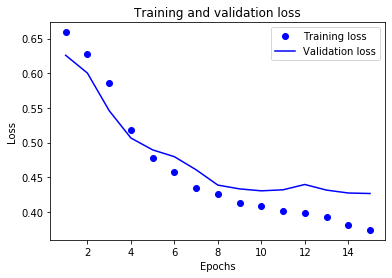

In [18]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

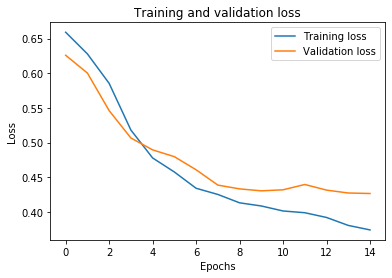

In [19]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();
plt.show()

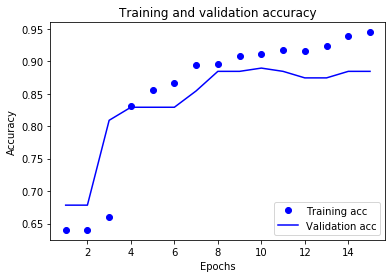

In [20]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

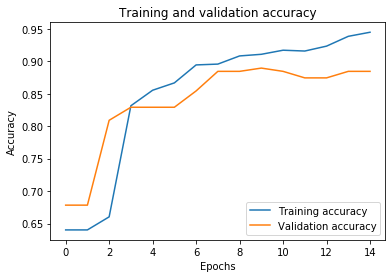

In [21]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()